In [1]:
import tensorflow as tf

In [2]:
# Keras es una serie de APIs de TensorFlow que permiten simplificar el desarrollo de modelos
from tensorflow import keras

# NumPy nos permite realizar operaciones de álgebra lineal, matrices y es muy flexible para ser utilizada con TensorFlow
import numpy as np

# Matplotlib simplifica la creación de gráficos y será muy importante para presentar los resultados obtenidos
import matplotlib.pyplot as plt

[1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0.]


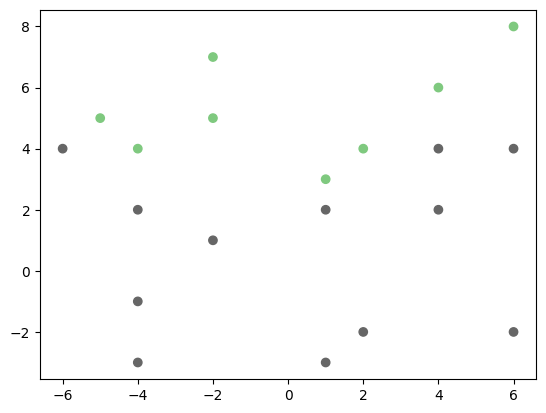

In [3]:
datos = np.loadtxt('sample_data/Datos-RedNeuronal.csv', delimiter=',', skiprows=1)
x = datos[:, 0:2]
y = datos[:, 2]
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='Accent')
print(y)

MODELO 1 CAPA

In [4]:
from keras.models import Sequential
from keras.layers import Dense

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6000 - loss: 1.7158
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6000 - loss: 1.7136
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.6000 - loss: 1.7114
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.6000 - loss: 1.7093
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.6000 - loss: 1.7071
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.6000 - loss: 1.7049
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.6000 - loss: 1.7028
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6000 - loss: 1.7006
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.6000 - loss: 1.6985
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.6000 - loss: 1.6963


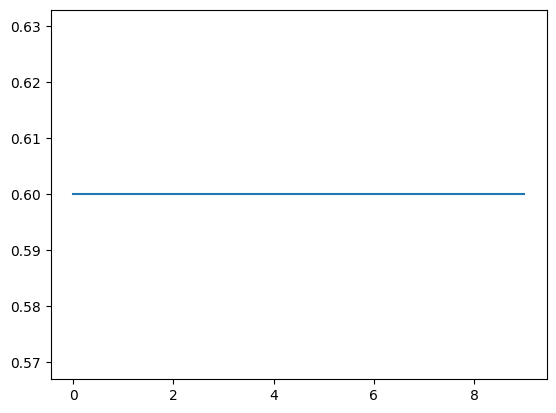

In [5]:
# Generamos el modelo de tipo secuencial, con la función de activación deseada y una capa.
# La función de activación es sigmoide. También puedes usar otros tipos, como ReLU
modelo = Sequential()
modelo.add(Dense(1, input_dim=2, activation='sigmoid'))
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Ya que está listo el modelo, procedemos a entrenar con 1000 epochs, es decir, 1000 ciclos de entrenamiento
hist = modelo.fit(x, y, epochs=10, verbose=1) # El parámetro verbose nos permite ir imprimiendo los resultados por capa.
plt.plot(hist.history['accuracy'])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


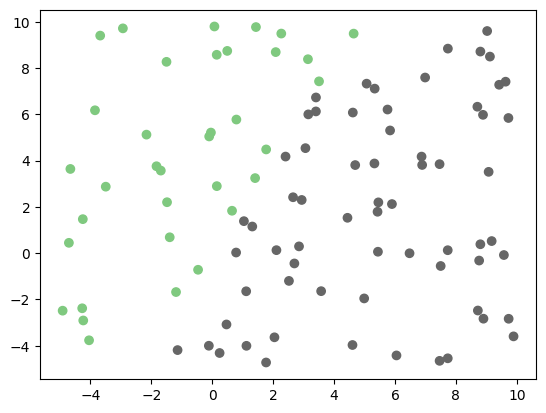

In [6]:
pruebas = 15 * np.random.rand(100, 2) - 5
resultado_pruebas = modelo.predict(pruebas).round()
plt.scatter(pruebas[:, 0], pruebas[:, 1], c=resultado_pruebas, cmap='Accent')

2 CAPAS

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5500 - loss: 0.6433
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.6000 - loss: 0.6429
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.6000 - loss: 0.6426
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.6000 - loss: 0.6423
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.6000 - loss: 0.6420
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.6000 - loss: 0.6417
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.6000 - loss: 0.6413
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - accuracy: 0.6000 - loss: 0.6410
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.6000 - loss: 0.6407
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.6000 - loss: 0.6404
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.6000 - loss: 0.6401
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.6

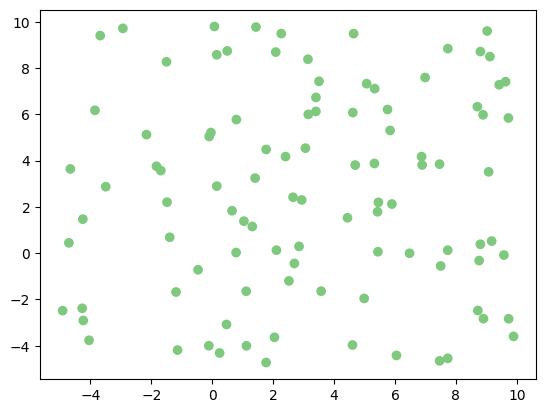

In [7]:
# Añadimos una capa más y volvemos a entrenar con los mismos datos
modelo_2 = Sequential([
    Dense(2, input_dim=2, activation='sigmoid'),
    Dense(1, activation='sigmoid')
])
modelo_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
modelo_2.fit(x, y, epochs=100)
# Probamos con los datos de prueba que ya teníamos
resultado_pruebas_2 = modelo_2.predict(pruebas).round()
plt.scatter(pruebas[:, 0], pruebas[:, 1], c=resultado_pruebas_2, cmap='Accent')

3 CAPAS

(20, 2)
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4000 - loss: 0.7761
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.4000 - loss: 0.7754
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4000 - loss: 0.7747
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4000 - loss: 0.7740
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4000 - loss: 0.7733
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4000 - loss: 0.7727
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.4000 - loss: 0.7720
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4000 - loss: 0.7713
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4000 - loss: 0.7707
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4000 - loss: 0.7700
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4000 - loss: 0.7693
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.400

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


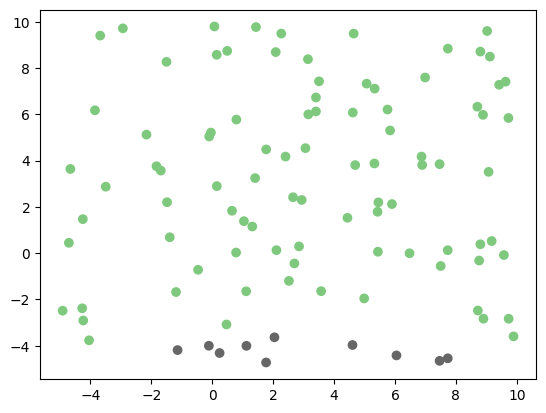

In [8]:
# Inicializamos un nuevo objeto para el modelo 3 y añadimos una capa más y volvemos a entrenar con los mismos datos
print(x.shape)
modelo_3 = Sequential([
    Dense(2, input_dim=2),
    Dense(2, activation='sigmoid'),
    Dense(1,activation='sigmoid')
])
modelo_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
modelo_3.fit(x, y, epochs=100, verbose=1)
# Probamos con los datos de prueba que ya teníamos
resultado_pruebas_3 = modelo_3.predict(pruebas).round()
plt.scatter(pruebas[:, 0], pruebas[:, 1], c=resultado_pruebas_3, cmap='Accent')

In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("sample_data"))

['README.md', 'anscombe.json', 'test.csv', 'boston_housing_esp.csv', 'sample_submission.csv', 'Datos-RedNeuronal.csv', 'train.csv', 'california_housing_test.csv', 'mnist_test.csv', 'mnist_train_small.csv', 'california_housing_train.csv']


In [10]:
train = pd.read_csv("sample_data/train.csv")
print(train.shape)
train.head()

(12616, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
test= pd.read_csv("sample_data/test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Guardamos las clases en la variable y_train
Y_train = train["label"]
# Quitamos la columna 'label'
X_train = train.drop(labels = ["label"],axis = 1)

In [14]:
# Normalizamos las imagenes
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (12616, 784)
test shape:  (28000, 784)


In [15]:
# Cambiamos de tamano
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)


x_train shape:  (12616, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [22]:
# Label Encoding
from tensorflow.keras import utils # convertimos a one-hot-encoding
Y_train = utils.to_categorical(Y_train, num_classes = 10)

In [23]:
# Dividimos el set de entrenamiento entre set de entrenamiento y set de validacion.
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (11354, 28, 28, 1)
x_test shape (1262, 28, 28, 1)
y_train shape (11354, 10)
y_test shape (1262, 10)


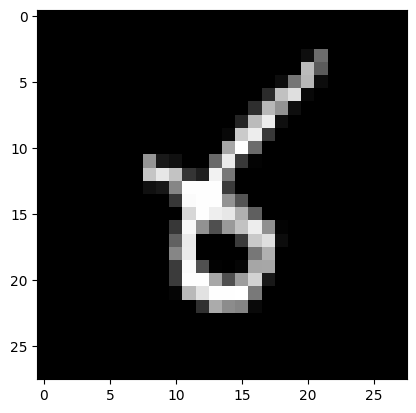

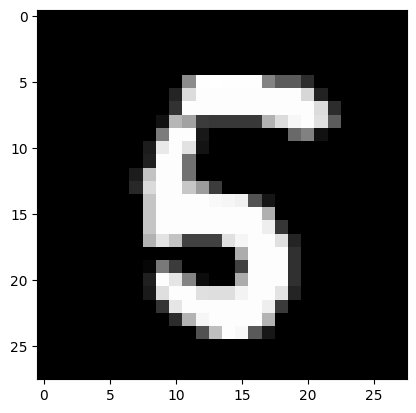

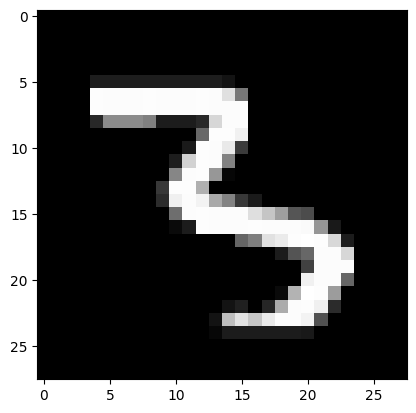

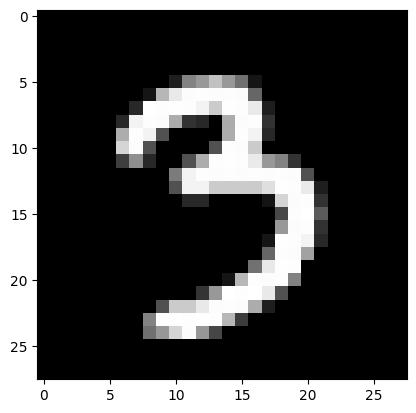

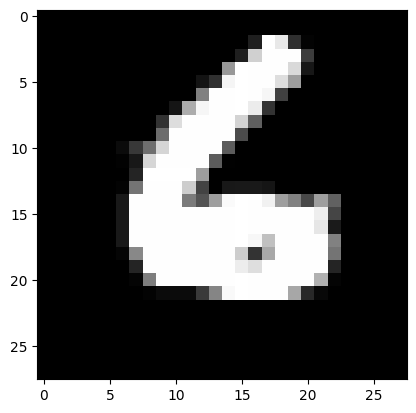

In [24]:
for i in range (0, 5):
    plt.imshow(X_train[i][:,:,0],cmap='gray')
    plt.show()

In [27]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [29]:
# Define the optimizer
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [30]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [31]:
epochs = 6  # for better result increase the epochs
batch_size = 250

In [32]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [34]:
history = model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/6
45/45 ━━━━━━━━━━━━━━━━━━━━ 16s 228ms/step - accuracy: 0.2042 - loss: nan - val_accuracy: 0.0998 - val_loss: nan
Epoch 2/6
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.0960 - loss: nan - val_accuracy: 0.0998 - val_loss: nan
Epoch 3/6
45/45 ━━━━━━━━━━━━━━━━━━━━ 20s 247ms/step - accuracy: 0.0994 - loss: nan - val_accuracy: 0.0998 - val_loss: nan
Epoch 4/6
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0880 - loss: nan - val_accuracy: 0.0998 - val_loss: nan
Epoch 5/6
45/45 ━━━━━━━━━━━━━━━━━━━━ 18s 196ms/step - accuracy: 0.0966 - loss: nan - val_accuracy: 0.0998 - val_loss: nan
Epoch 6/6
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.0880 - loss: nan - val_accuracy: 0.0998 - val_loss: nan


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


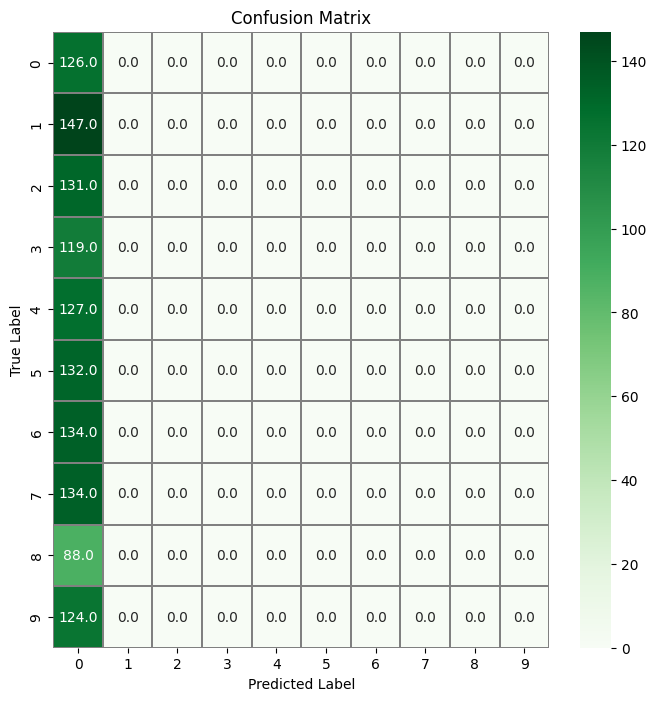

In [37]:
# matriz de confusion
import seaborn as sns
# Predice los valores para el set de validacion.
Y_pred = model.predict(X_val)
# Convierte las predicciones a one-hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convierte los valores verdaderos de validacion a one-hot vectors
Y_true = np.argmax(Y_val,axis = 1)
# calcula la matriz de confusion
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# grafica la matriz de confusion
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

PERCEPTRON

In [39]:
# Quitamos los warning para una correcta visualización de los datos
import warnings
warnings.simplefilter("ignore")

# Importamos las librerías necesarias para la ejecución del código
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
import pandas as pd
import numpy as np

data_iris = datasets.load_iris()
df = pd.DataFrame(data= np.c_[data_iris['data'], data_iris['target']],
                     columns= data_iris['feature_names'] + ['target'])

# Para este ejemplo del Perceptron trabajaremos con 2 clases ya que solo se puede implementar para uso binario
df = df[df['target'] != 2.0]


In [40]:
# Pasemos a dividir el dataset para el entrenamiento de la red neuronal
# Librerías necesarias
from sklearn.model_selection import train_test_split

# Selección de los datos
y = df['target']
X = df.loc[:, df.columns != 'target']

X_train,X_test, Y_train,Y_test = train_test_split(X,y,test_size=0.2, random_state=25)


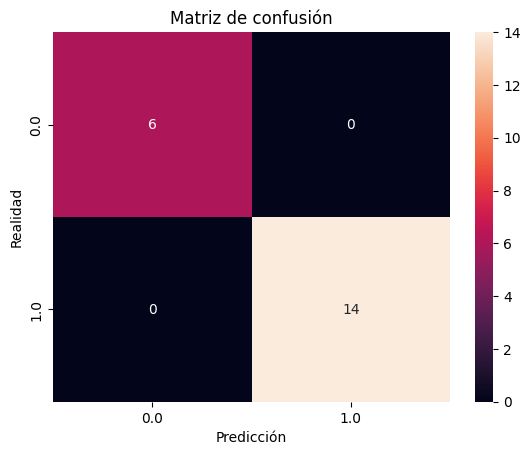

  - El porcentaje de acierto es del: 100.0%


In [41]:
# Creación y entrenamiento de la red neuronal
# Librerías necesarias
from sklearn.linear_model import Perceptron

# Creación del perceptron y ajuste de los datos
model = Perceptron(random_state=25).fit(X_train, Y_train)

# Realizamos las predicciones y vemos las métricas
# Librerías necesarias
from sklearn import metrics

# Predicciones
predictions = model.predict(X_test)

# Métricas y visualizaciones
cm_bow = metrics.confusion_matrix(Y_test, predictions)

class_label = y.unique()
df_cm = pd.DataFrame(cm_bow, index = class_label, columns = class_label)

sns.heatmap(df_cm, annot = True, fmt = 'd')
plt.title('Matriz de confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

print(f'  - El porcentaje de acierto es del: {np.round(metrics.accuracy_score(Y_test, predictions), 2) * 100}%')

In [42]:
# Quitamos los warning para una correcta visualización de los datos
import warnings
warnings.simplefilter("ignore")

# Importamos las librerías necesarias para la ejecución del código
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
import pandas as pd
import numpy as np

data_iris = datasets.load_iris()
df = pd.DataFrame(data= np.c_[data_iris['data'], data_iris['target']],
                     columns= data_iris['feature_names'] + ['target'])

In [43]:
# Pasemos a dividir el dataset para el entrenamiento de la red neuronal
# Librerías necesarias
from sklearn.model_selection import train_test_split

# Selección de los datos
y = df['target']
X = df.loc[:, df.columns != 'target']

X_train,X_test, Y_train,Y_test = train_test_split(X,y,test_size=0.2, random_state=25)

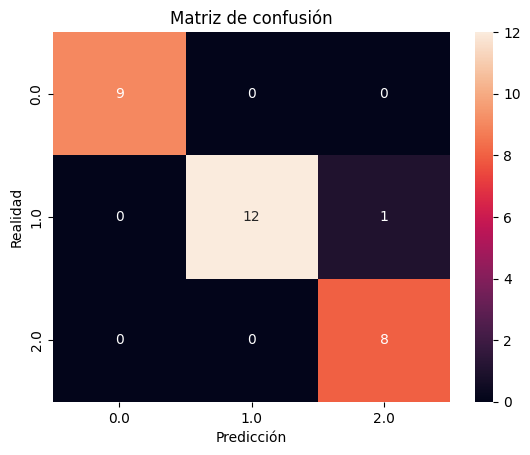

  - El porcentaje de acierto es del: 97.0%


In [44]:
# Creación y entrenamiento de la red neuronal
# Librerías necesarias
from sklearn.neural_network import MLPClassifier

# Creación del perceptron multicapa y ajuste de los datos
model = MLPClassifier(hidden_layer_sizes=5, max_iter=35, activation='relu', solver='sgd',random_state=25, learning_rate='constant', learning_rate_init=0.05).fit(X_train, Y_train)

# Realizamos las predicciones y vemos las métricas
# Librerías necesarias
from sklearn import metrics

# Predicciones
predictions = model.predict(X_test)

# Métricas y visualizaciones
cm_bow = metrics.confusion_matrix(Y_test, predictions)

class_label = y.unique()
df_cm = pd.DataFrame(cm_bow, index = class_label, columns = class_label)

sns.heatmap(df_cm, annot = True, fmt = 'd')
plt.title('Matriz de confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

print(f'  - El porcentaje de acierto es del: {np.round(metrics.accuracy_score(Y_test, predictions), 2) * 100}%')